In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline #如果你使用用的是Jupyter Notebook的话请取消注释。

np.random.seed(1) #设置一个固定的随机种子，以保证接下来的步骤中我们的结果是一致的。

UsageError: unrecognized arguments: #如果你使用用的是Jupyter Notebook的话请取消注释。


In [2]:
X,Y=load_planar_dataset()

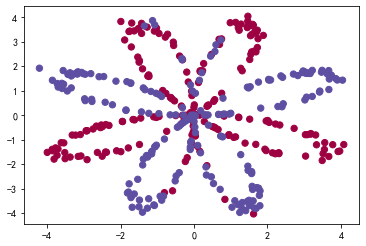

In [3]:
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # 训练集里面的数量

print ("X的维度为: " + str(shape_X))
print ("Y的维度为: " + str(shape_Y))
print ("数据集里面的数据有：" + str(m) + " 个")

X的维度为: (2, 400)
Y的维度为: (1, 400)
数据集里面的数据有：400 个


In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegressionCV()

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


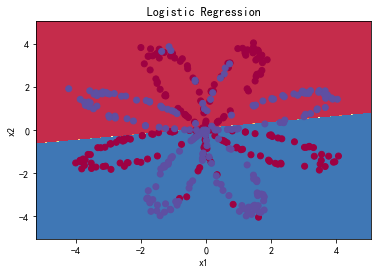

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) + 
		np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       "% " + "(正确标记的数据点所占的百分比)")

In [7]:
def layer_size(X,Y,hidden_size):
    """
    参数：
     X - 输入数据集,维度为（输入的数量，训练/测试的数量）
     Y - 标签，维度为（输出的数量，训练/测试数量）
     hidden_size - 隐藏层的神经元个数
    返回：
     n_x - 输入层的数量
     n_h - 隐藏层的数量
     n_y - 输出层的数量
    """
    n_x = X.shape[0]
    n_h = hidden_size
    n_y = Y.shape[0]
    
    return (n_x,n_h,n_y)

In [8]:
def initialize_parameters(n_x,n_h,n_y):
    """
    参数：
        n_x - 输入层节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量
    
    返回：
        parameters - 包含参数的字典：
        W1 - 权重矩阵,维度为（n_h，n_x）
        b1 - 偏向量，维度为（n_h，1）
        W2 - 权重矩阵，维度为（n_y，n_h）
        b2 - 偏向量，维度为（n_y，1）

    """
    W1 = np.random.randn(n_h,n_x) * 0.01
    W2 = np.random.randn(n_y,n_h) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    b2 = np.zeros(shape=(n_y,1))
    
    parameters = {
        "W1":W1,
        "W2":W2,
        "b1":b1,
        "b2":b2
    }
    
    return parameters

In [9]:
print("=========================测试initialize_parameters=========================")    
parameters = initialize_parameters(2 , 4 , 1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试initialize_parameters=========================
W1 = [[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00209097  0.01555016 -0.00569149 -0.01061797]]
b2 = [[0.]]


In [10]:
def forward_propagation( X , parameters ):
    """
    参数：
         X - 维度为（n_x，m）的输入数据。
         parameters - 初始化函数（initialize_parameters）的输出
    
    返回：
         !!!A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return cache

In [11]:
def compute_cost(A2,Y):
    """
    计算方程（6）中给出的交叉熵成本，
    
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
    返回：
         成本 - 交叉熵成本给出方程（13）
    """
    m = Y.shape[1]
    cost = float(1/m * np.sum((1-Y)*np.log(1-A2) + Y*np.log(A2)))
    
    assert(isinstance(cost,float))
    
    return cost